# EPA1361 - Model-Based Decision Making 
## Week 3 - Sensitivity Analysis 
## In class exercise: The flood example

This exercise uses a simplified flood model based on the 1D Saint Venant dynamic equation.  The equation represents the characteristics of a river stretch with the purpose of simulating the height of a river:   

\begin{align}
Y=Z_v+\left(\frac{Q}{BK_s\sqrt{\frac{Z_m-Zv}{L}}}\right)^{0.2}
\end{align}

where $Y$ is the maximum annual overflow, $H$ is the maximum annual height of the river, $B$ is the river width, and $L$ is the length of the river stretch. In this case we set $L=5000$, and $B=300$. The model assumes a uniform and constant flow rate.   The figure below shows the dyke that protects from downstream flooding. When the river height exceeds that of the dyke, flooding occurs.

<div>
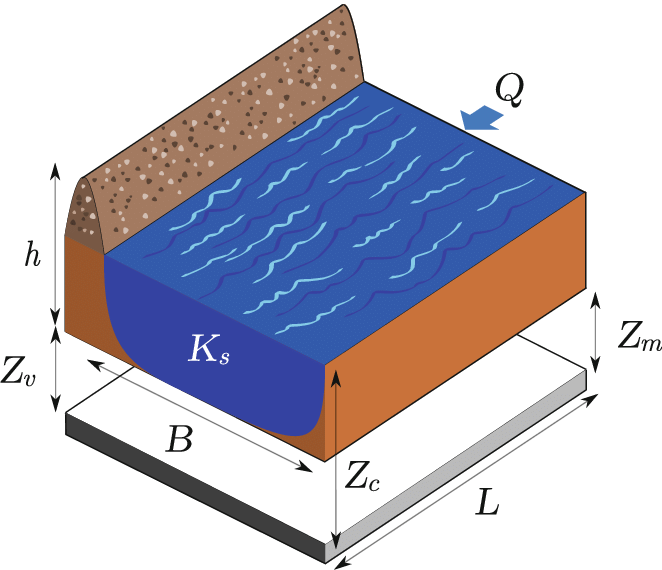
</div>

|Parameter|Description|Unit|Probability distribution|
|:-:|:-:|:-:|:-:
|Q|Annual flow rate|$$m^3/s$$|Uniform $U$(49,51)
|$K_s$|Strickler coefficient|-|Normal $N$(30,8.0) 
|$Z_v$|River downstram level|m|Uniform $U$(49,51)
|$Z_m$|River upstream level|m|Uniform $U$(54, 56)


The estimation of the random variables in the table above is innacurate due to their spatio-temporal variability. Your task is to help prioritize investments to better understand the factors that may contribute to the largest errors in our estimation of the maximum annual overflow. Such investments may include better measurements and data collection. 
Please provide a short summary of your findings supported by your analysis presented in a graphical format.  You can rely on [SALib](https://salib.readthedocs.io/en/latest/index.html) to perform your analysis. 



Think about the following questions:

1. Which factor or combination of factors are more influential?
2. Are there any compound effects?

Reference: Baudin, Michaël, et al. "Openturns: An industrial software for uncertainty quantification in simulation." Handbook of uncertainty quantification. Springer, Cham, 2017. 2001-2038.

In [3]:
import SALib

from SALib.sample import (morris, latin, saltelli, fast_sampler)
from SALib.analyze import (morris, sobol, fast)
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


def flood_function(Q, Ks, Zv, Zm):
    Hd = 3.0
    Zb = 55.5
    L = 5.0e3
    B = 300.0
    Zd = Zb + Hd
    alpha = (Zm - Zv)/L
    H = (Q / (Ks * B * (alpha)**0.5)) ** (3.0 / 5.0)
    Y = H + Zv
    return Y


In [4]:
SALib.__version__

'1.4.6b0'

In [5]:
from SALib.sample import saltelli

In [6]:
problem = {
    'names': ['Q', 'Ks', 'Zv', 'Zm'],
    'num_vars': 4,
    'bounds': [[49, 51], [30.0, 8.0], [49, 51], [54, 56]],
    'dists': ['unif', 'norm', 'unif', 'unif']
}

In [7]:
param_values = saltelli.sample(problem, 1024)

In [8]:
param_values

array([[49.00292969, 27.48177042, 49.89550781, 54.97363281],
       [50.11425781, 27.48177042, 49.89550781, 54.97363281],
       [49.00292969, 38.09624455, 49.89550781, 54.97363281],
       ...,
       [50.26074219, 33.24987594, 50.86230469, 54.06347656],
       [50.26074219, 33.24987594, 49.23535156, 54.70214844],
       [50.26074219, 33.24987594, 49.23535156, 54.06347656]])

In [9]:
Y = np.zeros([param_values.shape[0]])

for i, X in enumerate(param_values):
    Y[i] = flood_function(*X)

In [10]:
Y

array([50.26060933, 50.26555507, 50.19563902, ..., 51.2420469 ,
       49.5587677 , 49.57104899])

In [11]:
Si = sobol.analyze(problem, Y)
total_Si, first_Si, second_Si = Si.to_df()

In [12]:
first_Si

,S1,S1_conf
Q,0.000023,0.000397
Ks,0.018411,0.014800
Zv,0.982331,0.071642
Zm,0.000440,0.001960


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

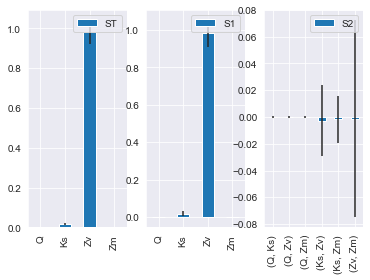

In [13]:
Si.plot()